# Implementation 4 of the Image Classfication Model (46 Animals)

In [1]:
# Import the necessary libraries:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential# used for the model

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


### Dataset import:

In [37]:
# import the data:
import pandas
dataset_path = "./uk-image-dataset"#path to the data

### Load in the dataset:

In [38]:
#Loading the Data in a faster and more efficient manner:
files = os.listdir(dataset_path)#gather the path:
#paths to the files
folder_path = os.path.join(dataset_path)#path to the images
#tf.keras.utils.image_dataset_from_directory?? # ?? allows me to see the documentation
data  = tf.keras.utils.image_dataset_from_directory(folder_path,image_size=(255,255))
print(type(data))

Found 13892 files belonging to 46 classes.
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


### Preprocessing:

In [39]:
data = data.map(lambda x,y: (x/255, y))# tf function map to rescale the images
print(type(data))

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


### Visualise the data:

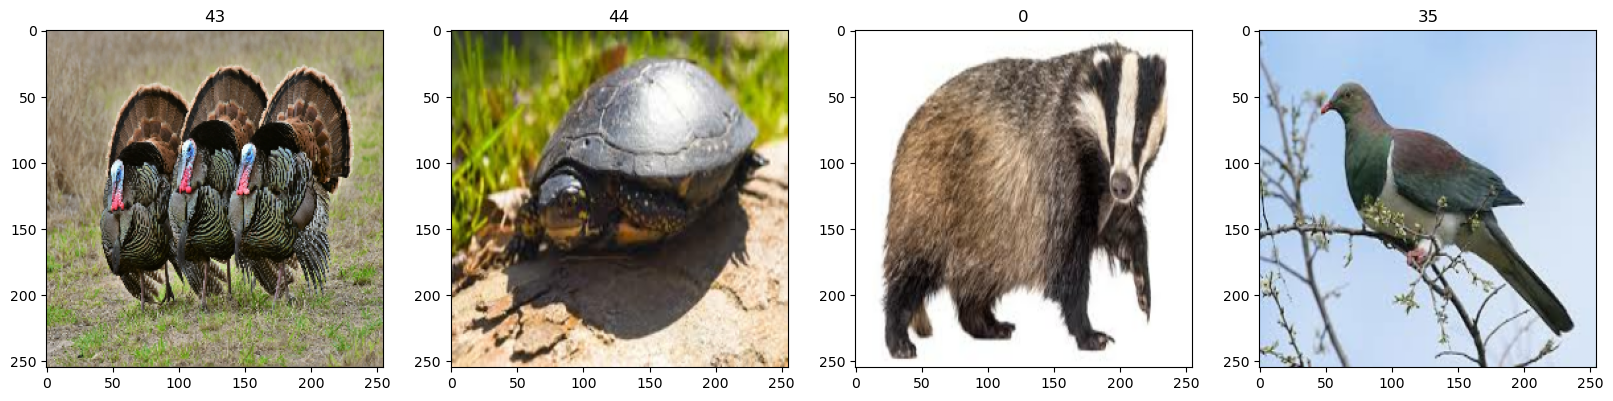

In [7]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
# batch[0].shape
#visualise the data:
fig, axis = plt.subplots(ncols=4, figsize=(20, 20))
batch_images = batch[0][:4]
batch_labels = batch[1]

for idx in range(4):
    axis[idx].imshow(batch_images[idx])
    axis[idx].title.set_text(batch_labels[idx])

### Split the Data

In [8]:
print(batch[0].max())
print(batch[0].min())

#Split the data:
print("Length: ",len(data))
#Size for each batch: (70% train, 15% validation, 15% test)
train_size = round(len(data) * 0.7)
validation_size = round(len(data)*0.2)
test_size = len(data) - train_size - validation_size
print(train_size,validation_size,test_size)

1.0
0.0
Length:  435
304 87 44


In [9]:
#Alocate the Batches to the data:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(validation_size)
test_data = data.skip(train_size+validation_size).take(test_size)

print(len(train_data))

304


### Train the Model:

In [7]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(255, 255, 3))

87910968/87910968 [==============================] - 6s 0us/step


In [8]:
#if I set this to true it will take longer to train the model:
for layer in base_model.layers:
     layer.trainable = False

base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 255, 255, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 29, 29, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 29, 29, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 29, 29, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 29, 29, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 29, 29, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 29, 29, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 29, 29, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 29, 29, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 29, 29, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 29, 29, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 14, 14, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 14, 14, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 14, 14, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 14, 14, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 14, 14, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 14, 14, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 14, 14, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 14, 14, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 14, 14, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 14, 14, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 14, 14, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 14, 14, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 14, 14, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 14, 14, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 14, 14, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 14, 14, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 14, 14, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 6, 6, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 6, 6, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 6, 6, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 6, 6, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 6, 6, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 6, 6, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [10]:
model = Sequential()
#transfer learning model added:
model.add(base_model)
model.add(layers.Flatten())
#fully connected layers:
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
#output:
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 46)                23598     
                                                                 
Total params: 40832590 (155.76 MB)
Trainable params: 19029806 (72.59 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [16]:
inception1_2 = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,)

Epoch 1/20
304/304 [==============================] - 859s 3s/step - loss: 1.7316 - accuracy: 0.6105 - val_loss: 1.0525 - val_accuracy: 0.7245
Epoch 2/20
304/304 [==============================] - 981s 3s/step - loss: 0.6214 - accuracy: 0.8279 - val_loss: 1.2019 - val_accuracy: 0.7317
Epoch 3/20
304/304 [==============================] - 997s 3s/step - loss: 0.2909 - accuracy: 0.9137 - val_loss: 1.3823 - val_accuracy: 0.7213
Epoch 4/20
304/304 [==============================] - 973s 3s/step - loss: 0.1455 - accuracy: 0.9536 - val_loss: 1.3814 - val_accuracy: 0.7730
Epoch 5/20
304/304 [==============================] - 905s 3s/step - loss: 0.0957 - accuracy: 0.9721 - val_loss: 1.4752 - val_accuracy: 0.7547
Epoch 6/20
304/304 [==============================] - 880s 3s/step - loss: 0.0823 - accuracy: 0.9764 - val_loss: 1.7433 - val_accuracy: 0.7565
Epoch 7/20
304/304 [==============================] - 897s 3s/step - loss: 0.0659 - accuracy: 0.9814 - val_loss: 2.0013 - val_accuracy: 0.7453

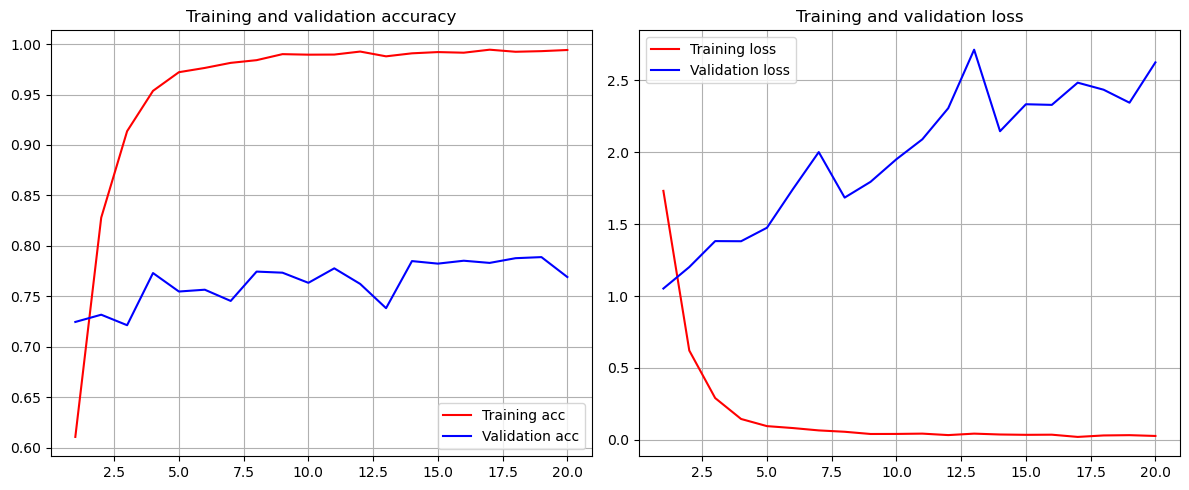

In [19]:
def visualise(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].grid(True)
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()
visualise(inception1_2)

### Evaluate on test set

In [20]:
test_results = model.evaluate(test_data)

# Print the test accuracy and loss
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

44/44 [==============================] - 108s 1s/step - loss: 2.4851 - accuracy: 0.7674
Test Loss: 2.4850680828094482
Test Accuracy: 0.7673913240432739


### Saving the model:

In [22]:
model.save('good_model.h5')

C:\Users\Dima\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Convert the model to tf Lite:

In [43]:
# Convert the model.
model = tf.keras.models.load_model('transfer_learning_model_accurate.h5')
# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 46)                23598     
                                                                 
Total params: 40832590 (155.76 MB)
Trainable params: 19029806 (72.59 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


## Own Tests:

In [24]:
import cv2
def load_img_for_own_test(path):
    img = cv2.imread(path)
    resize = tf.image.resize(img,(255,255))
    preprocessed_img = resize.numpy().astype('float32') / 255.0
    preprocessed_img = tf.expand_dims(preprocessed_img, axis=0)
    predictions = model.predict(preprocessed_img)
    #return the prediction
    return tf.argmax(predictions, axis=1).numpy()[0]


In [28]:
def index_to_animal(index):
    animals = ['badger', 'bat', 'bee', 'beetle', 'butterfly', 'cat', 'caterpillar', 'cockroach', 'cow', 'crab', 'crow', 'deer', 'dog', 'donkey', 'dragonfly', 'duck', 'eagle', 'fly', 'fox', 'goat', 'goose', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'horse', 'ladybugs', 'lobster', 'mosquito', 'moth', 'mouse', 'otter', 'owl', 'parrot', 'pig', 'pigeon', 'racoon', 'rat', 'sheep', 'snake', 'sparrow', 'squirrel', 'swan', 'turkey', 'turtle', 'woodpecker']
    return animals[index]

In [29]:
#predict test_1:
idx = load_img_for_own_test('test.jpg')
print("Predicted class index:", index_to_animal(idx))

1/1 [==============================] - 0s 78ms/step
Predicted class index: turtle


In [30]:
#predict test_2:
idx = load_img_for_own_test('test_2.jpg')
print("Predicted class index:", index_to_animal(idx))

1/1 [==============================] - 0s 79ms/step
Predicted class index: woodpecker


In [31]:
#predict test_3:
idx = load_img_for_own_test('test_this.png')
print("Predicted class index:", index_to_animal(idx))

1/1 [==============================] - 0s 82ms/step
Predicted class index: cat


In [46]:
import cv2
import tensorflow as tf

def bitmap_conversion(path):
    img = cv2.imread(path)
    resized_img = cv2.resize(img, (255, 255))
    preprocessed_img = resized_img.astype('float32') / 255.0
    preprocessed_img = tf.expand_dims(preprocessed_img, axis=0)
    predictions = model.predict(preprocessed_img)
    return tf.argmax(predictions, axis=1).numpy()[0]


In [52]:
idx = bitmap_conversion('temp.bmp')
print("Predict class: ", index_to_animal(idx))

1/1 [==============================] - 0s 85ms/step
Predict class:  cat
